# 环境安装

In [ ]:
# pip
!pip install -r requirements.txt -i https://mirrors.aliyun.com/pypi/simple/
# conda
#!conda env create -f environment.yml
#!conda activate image

# 色域
导入需要的库

In [1]:
import numpy as np
from matplotlib.colors import hsv_to_rgb
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
%matplotlib inline

绘制HSV色域，亮度值为100%

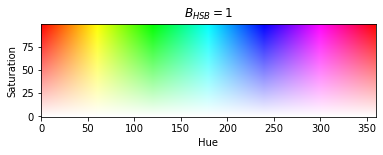

In [2]:
# 获得 饱和度Saturation和色调Hue的分布  S:0~1 H:0~1
S, H = np.mgrid[0:1:100j, 0:1:360j]
# 固定亮度 Brightness B:0~1
B = np.ones_like(S)
# 合成图像
HSB = np.dstack((H,S,B))
# 转换为RGB更方便显示
RGB = hsv_to_rgb(HSB)
# 获得当前画布方便后面保存
fig = plt.figure()
# 显示图像，并把坐标(0,0)放左下角
plt.imshow(RGB,origin="lower")
# 绘制坐标
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("$B_{HSB}=1$")
plt.show()


保存图像

In [3]:
fig.savefig("hsb_color_space.png")

# 色轮
绘制HSB色轮，亮度为100%

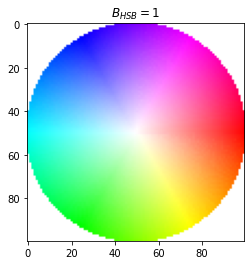

In [4]:
# 获得当前画布方便后面保存
fig = plt.figure()
# 亮度 100% 
brightness = 100
# 图像大小
width, high = 100, 100
# 图像中心
center_x,center_y = width/2,high/2
# 图像矩阵
matrix = 255 * np.ones((width, high, 3), dtype='uint8')
# 转换为图像
image = Image.fromarray(matrix)
# 获得图像绘制句柄
draw = ImageDraw.Draw(image)
# 细分步长
step = 500
# 色调细分
hue = np.linspace(0,360,step)
# 饱和度细分
saturation = np.linspace(0,100,step)
# 绘制色轮
for i in range(step):
    for j in range(step):
        # 角度
        theta = hue[i] * np.pi / 180
        # 半径
        r = saturation[j]  * center_x / 100
        # 绘制点
        draw.point([center_x+r*np.cos(theta),center_y+r*np.sin(theta)],fill='hsv(%d,%d%%,%d%%)'% (hue[i], saturation[j], brightness))
# 标题
plt.title("$B_{HSB}=1$")
# 显示图像
plt.imshow(image)

保存图像

In [5]:
fig.savefig("hsb_color_wheel.png")

# 三维色锥

In [6]:
# 运行matlab
!matlab -nosplash -nodesktop -r work1 